## Q2. 
### A. 

In [1]:
# Importing necessary libraries 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Reading the Data
data = scipy.io.loadmat('Data1_NDM.mat')['Data1_NDM']

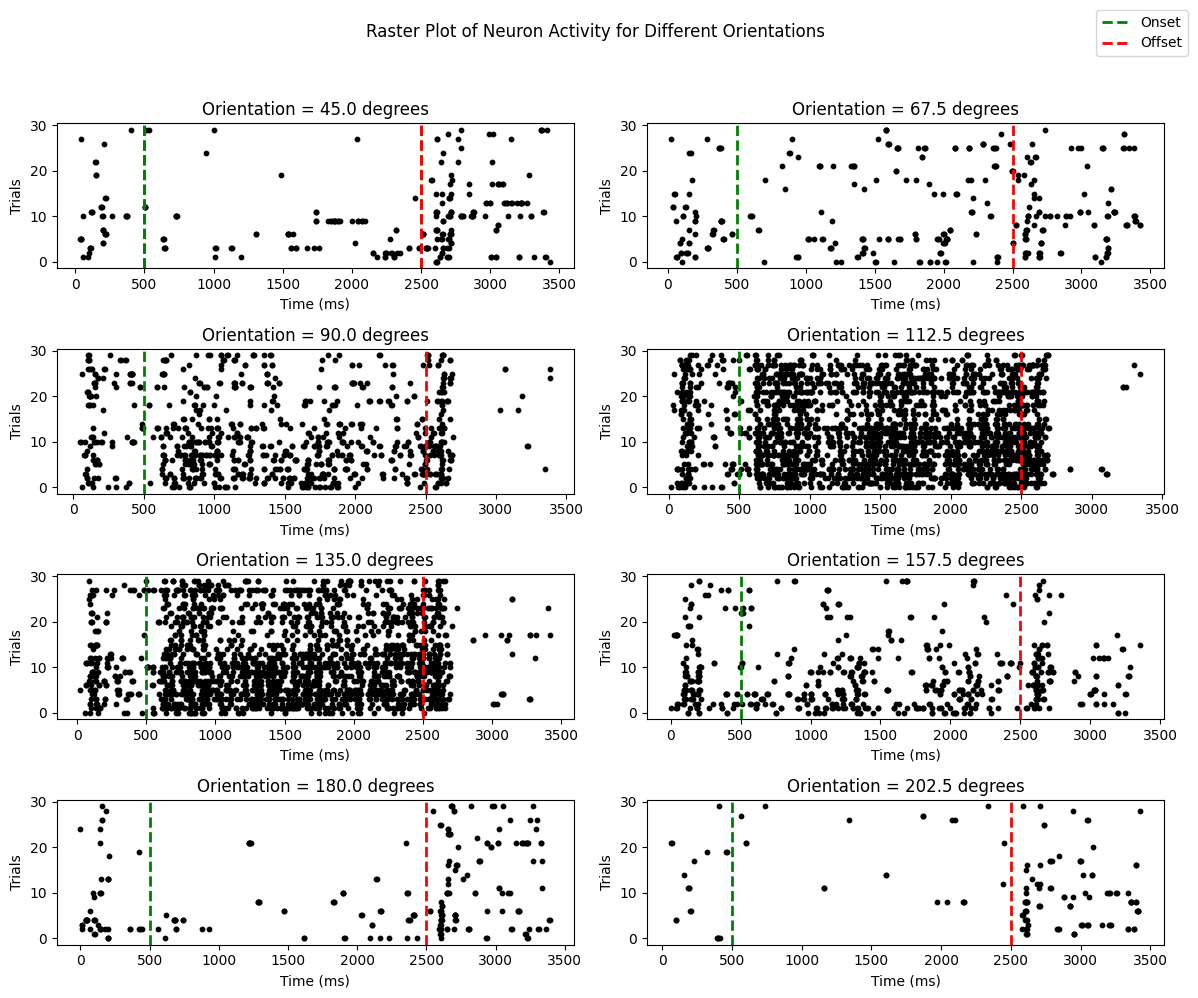

In [2]:
onsetTime = 500  # Stimulus start time
offsetTime = 2500  # Stimulus end time 

labels = []
flag = 1

# Subplots (4 rows x 2 columns)
fig, axs = plt.subplots(4, 2, figsize=(12, 10))

for orientation in range(8):
    ax = axs[orientation // 2, orientation % 2]

    # Slicing Data for visualization
    currData = data[orientation, :, :]

    # Spikes
    spikes, trialIndexes = np.where(currData)

    # Plotting spikes
    ax.scatter(spikes, trialIndexes, marker='o', color='black', s=10)

    # Marking
    ax.axvline(x=onsetTime, color='green', linestyle='--', linewidth=2)
    ax.axvline(x=offsetTime, color='red', linestyle='--', linewidth=2)

    # Labels 
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Trials')
    ax.set_title(f'Orientation = {45 + orientation * 22.5} degrees')

    if flag:
      labels.append(ax.axvline(x=onsetTime, color='green', linestyle='--', linewidth=2, label='Onset'))
      labels.append(ax.axvline(x=offsetTime, color='red', linestyle='--', linewidth=2, label='Offset'))
      flag = 0

# Title 
fig.suptitle('Raster Plot of Neuron Activity for Different Orientations')

fig.legend(handles=labels, bbox_to_anchor=(1, 1))

# Adjusting Spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### B.

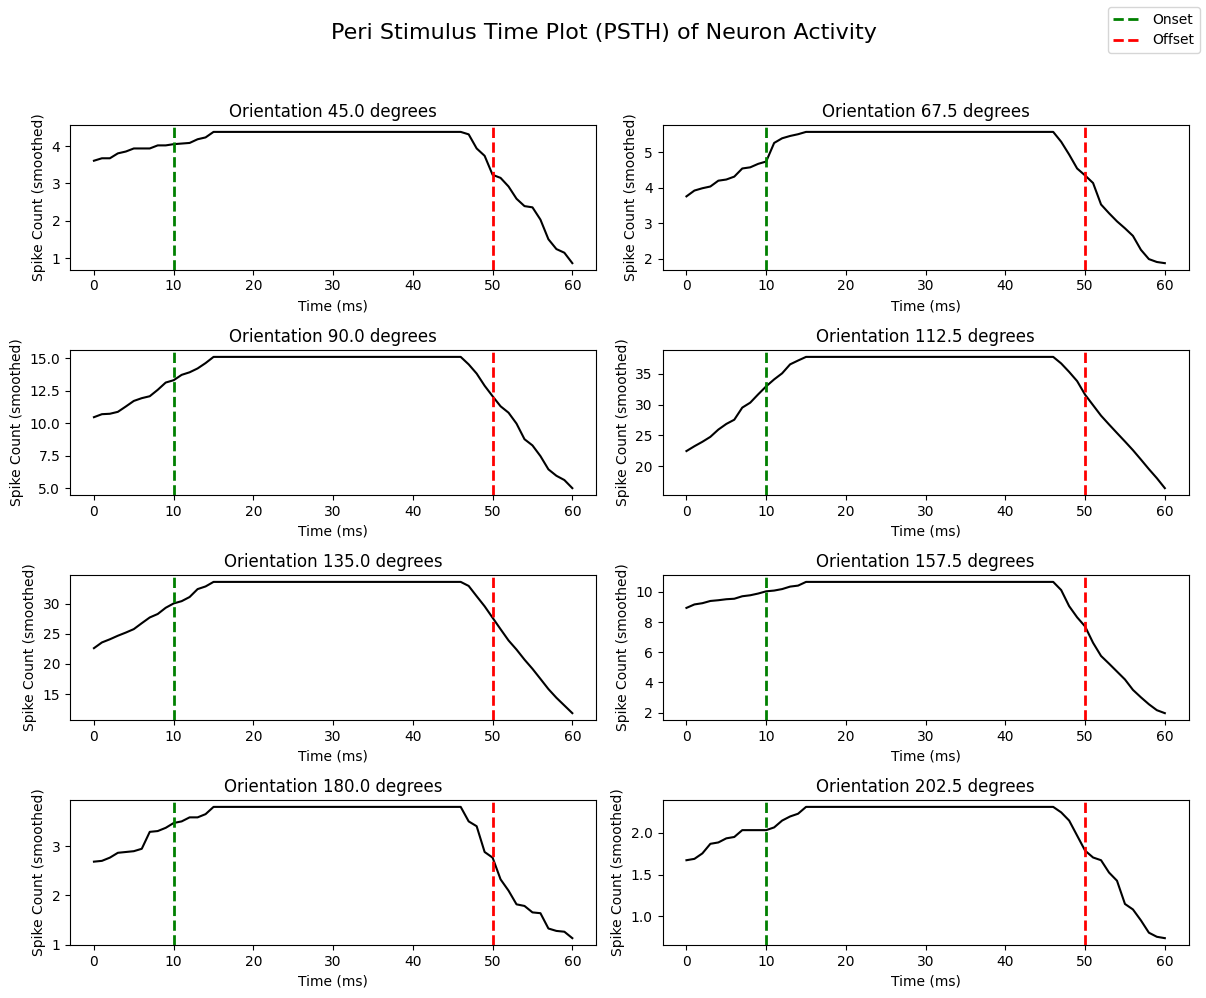

In [34]:
onsetTime = 10  # Stimulus start time
offsetTime = 50  # Stimulus end time

labels = []

# Defining the time for smoothing 
size = 61  # in ms
sampling = int(size / 1000 * 1000)  # 1000Hz Sampling Rate

fig, axs = plt.subplots(4, 2, figsize=(12, 10))

for orientation in range(8):
    ax = axs[orientation // 2, orientation % 2]

    # Slicing the data for visualization
    currData = data[orientation, :, :]

    # Smoothing the data
    fineData = np.convolve(currData.sum(axis=0), np.ones(sampling)/sampling, mode='same')

    time = np.arange(len(fineData))

    # Plot the PSTH as a line plot
    ax.plot(time, fineData, color='black')
    
    ax.axvline(x=onsetTime, color='green', linestyle='--', linewidth=2)
    ax.axvline(x=offsetTime, color='red', linestyle='--', linewidth=2)

    # Set axis labels and title
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Spike Count (smoothed)')
    ax.set_title(f'Orientation {45 + orientation * 22.5} degrees')

    # labels = [
    #     plt.Line2D([0], [0], color='green', linestyle='--', linewidth=2, label='Onset', loc='upper right'),
    #     plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='Offset', loc='upper right')
    # ]

    # ax.legend(handles=labels)

    # x-axis limits
    # ax.set_xlim(0, len(fineData))

# Final Labels
# plt.axvline(x=onsetTime, color='green', linestyle='--', linewidth=2, label='Onset')
# plt.axvline(x=offsetTime, color='red', linestyle='--', linewidth=2, label='Offset')

# labels for both onset and offset

# dummy1 = plt.Line2D([0], [0], color='green', linestyle='--', linewidth=2, label='Onset')
# dummy2 = plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='Offset')

fig.suptitle('Peri Stimulus Time Plot (PSTH) of Neuron Activity', fontsize=16)

labels = [
    plt.Line2D([0], [0], color='green', linestyle='--', linewidth=2, label='Onset'),
    plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='Offset')
]

fig.legend(handles=labels, loc='upper right')  
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.legend(handles=[dummy1,dummy2])
plt.show()


## C.



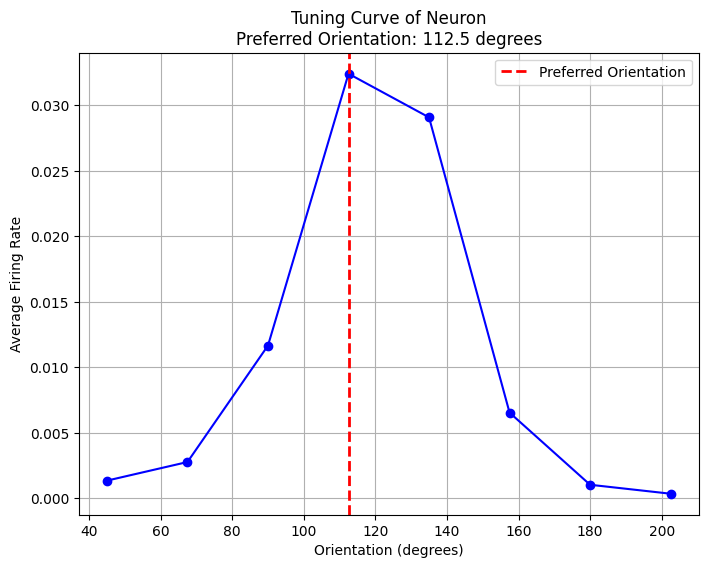

In [36]:
onsetTime = 600  # Stimulus start time
offsetTime = 2500   # Stimulus end time

#(1000Hz Sampling Rate)
startIndex = int(onsetTime * 1000 / 1000)  
endIndex = int(offsetTime * 1000 / 1000)

# Extracting Data
currData = data[:, startIndex:endIndex, :]

avgRate = np.mean(currData, axis=(1, 2))

# Maximum firing rate
orientation = (np.argmax(avgRate) * 22.5) + 45

# Creating tuning curve plot
plt.figure(figsize=(8, 6))
orientations = np.arange(45, 225, 22.5)
plt.plot(orientations, avgRate, marker='o', linestyle='-', color='blue')
plt.title(f'Tuning Curve of Neuron\nPreferred Orientation: {orientation} degrees')
plt.xlabel('Orientation (degrees)')
plt.ylabel('Average Firing Rate')
plt.grid(True)

# Adding Markers
plt.axvline(x=orientation, color='red', linestyle='--', linewidth=2, label='Preferred Orientation')
plt.legend()
plt.show()
# print(f'Preferred Orientation: {orientation} degrees')
